## NumPy

### The Scientific Python Trilogy

Why is Python so popular for research work?

MATLAB has typically been the most popular "language of technical computing", with strong built-in support for efficient numerical analysis with matrices (the *mat* in MATLAB is for Matrix, not Maths), and plotting.

Other dynamic languages have cleaner, more logical syntax (Ruby, Haskell)

But Python users developed three critical libraries, matching the power of MATLAB for scientific work:

* Matplotlib, the plotting library created by [John D. Hunter](https://en.wikipedia.org/wiki/John_D._Hunter)
* NumPy, a fast matrix maths library created by [Travis Oliphant](https://www.anaconda.com/people/travis-oliphant)
* IPython, the precursor of the notebook, created by [Fernando Perez](http://fperez.org)

By combining a plotting library, a matrix maths library, and an easy-to-use interface allowing live plotting commands
in a persistent environment, the powerful capabilities of MATLAB were matched by a free and open toolchain.

We've learned about Matplotlib and IPython in this course already. NumPy is the last part of the trilogy.

### Limitations of Python Lists

The normal Python List is just one dimensional. To make a matrix, we have to nest Python lists:

In [1]:
x= [list(range(5)) for N in range(5)]

In [2]:
x

[[0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4]]

In [3]:
x[2][2]

2

Applying an operation to every element is a pain:

In [4]:
x + 5

TypeError: can only concatenate list (not "int") to list

In [5]:
[[elem + 5 for elem in row] for row in x]

[[5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9]]

Common useful operations like transposing a matrix or reshaping a 10 by 10 matrix into a 20 by 5 matrix are not easy to code in raw Python lists.

### The NumPy array

NumPy's array type represents a multidimensional matrix $M_{i,j,k...n}$

The NumPy array seems at first to be just like a list:

In [5]:
import numpy as np
my_array=np.array(range(5))

In [7]:
my_array

array([0, 1, 2, 3, 4])

In [8]:
my_array[2]

2

In [9]:
for element in my_array:
    print("Hello" * element)


Hello
HelloHello
HelloHelloHello
HelloHelloHelloHello


We can also see our first weakness of NumPy arrays versus Python lists:

In [10]:
my_array.append(4)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

For NumPy arrays, you typically don't change the data size once you've defined your array,
whereas for Python lists, you can do this efficiently. However, you get back lots of goodies in return...

### Elementwise Operations

But most operations can be applied element-wise automatically!

In [11]:
my_array + 2

array([2, 3, 4, 5, 6])

These "vectorized" operations are very fast:

In [4]:
import numpy as np
big_list=range(10000)
big_array=np.arange(10000)

In [17]:
%%timeit
[x**2 for x in big_list]

3.17 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%%timeit
big_array**2

4.19 µs ± 50.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Arange and linspace

NumPy has two easy methods for defining floating-point evenly spaced arrays:

In [20]:
x=np.arange(0,10,0.1)

In [1]:
y = list(range(0,10,0.1))

TypeError: 'float' object cannot be interpreted as an integer

We can quickly define non-integer ranges of numbers for graph plotting:

In [5]:
import math
values=np.linspace(0, math.pi, 100) # Start, stop, number of steps

In [23]:
values

array([ 0.        ,  0.03173326,  0.06346652,  0.09519978,  0.12693304,
        0.1586663 ,  0.19039955,  0.22213281,  0.25386607,  0.28559933,
        0.31733259,  0.34906585,  0.38079911,  0.41253237,  0.44426563,
        0.47599889,  0.50773215,  0.53946541,  0.57119866,  0.60293192,
        0.63466518,  0.66639844,  0.6981317 ,  0.72986496,  0.76159822,
        0.79333148,  0.82506474,  0.856798  ,  0.88853126,  0.92026451,
        0.95199777,  0.98373103,  1.01546429,  1.04719755,  1.07893081,
        1.11066407,  1.14239733,  1.17413059,  1.20586385,  1.23759711,
        1.26933037,  1.30106362,  1.33279688,  1.36453014,  1.3962634 ,
        1.42799666,  1.45972992,  1.49146318,  1.52319644,  1.5549297 ,
        1.58666296,  1.61839622,  1.65012947,  1.68186273,  1.71359599,
        1.74532925,  1.77706251,  1.80879577,  1.84052903,  1.87226229,
        1.90399555,  1.93572881,  1.96746207,  1.99919533,  2.03092858,
        2.06266184,  2.0943951 ,  2.12612836,  2.15786162,  2.18

NumPy comes with 'vectorised' versions of common functions which work element-by-element when applied to arrays:

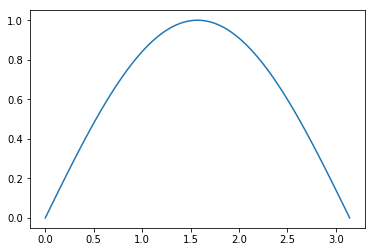

In [24]:
%matplotlib inline

from matplotlib import pyplot as plt
plt.plot(values, np.sin(values))

So we don't have to use awkward list comprehensions when using these.

### Multi-Dimensional Arrays

NumPy's true power comes from multi-dimensional arrays:

In [25]:
np.zeros([3,4,2])  # 3 arrays with 4 rows and 2 columns each

array([[[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]])

Unlike a list-of-lists in Python, we can reshape arrays:

In [6]:
x=np.array(range(40))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [32]:
y=x.reshape([4,5,2])
y

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9]],

       [[10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]],

       [[20, 21],
        [22, 23],
        [24, 25],
        [26, 27],
        [28, 29]],

       [[30, 31],
        [32, 33],
        [34, 35],
        [36, 37],
        [38, 39]]])

And index multiple columns at once:

In [34]:
y[3,2,1]

35

Including selecting on inner axes while taking all from the outermost:

In [37]:
y[:,2,1]

array([ 5, 15, 25, 35])

And subselecting ranges:

In [39]:
y[2:,:1,:]  # Last 2 axes, 1st row, all columns

array([[[20, 21]],

       [[30, 31]]])

And [transpose](https://en.wikipedia.org/wiki/Transpose) arrays:

In [41]:
y.transpose()

array([[[ 0, 10, 20, 30],
        [ 2, 12, 22, 32],
        [ 4, 14, 24, 34],
        [ 6, 16, 26, 36],
        [ 8, 18, 28, 38]],

       [[ 1, 11, 21, 31],
        [ 3, 13, 23, 33],
        [ 5, 15, 25, 35],
        [ 7, 17, 27, 37],
        [ 9, 19, 29, 39]]])

You can get the dimensions of an array with `shape`

In [47]:
y.shape

(4, 5, 2)

In [48]:
y.transpose().shape

(2, 5, 4)

Some numpy functions apply by default to the whole array, but can be chosen to act only on certain axes:

In [113]:
x=np.arange(12).reshape(4,3)
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [116]:
x.mean(1) # Mean along the second axis, leaving the first.

array([  1.,   4.,   7.,  10.])

In [117]:
x.mean(0) # Mean along the first axis, leaving the second.

array([ 4.5,  5.5,  6.5])

In [118]:
x.mean() # mean of all axes

5.5

### Array Datatypes

A Python `list` can contain data of mixed type:

In [51]:
x=['hello', 2, 3.4]

In [52]:
type(x[2])

float

In [53]:
type(x[1])

int

A NumPy array always contains just one datatype:

In [54]:
np.array(x)

array(['hello', '2', '3.4'],
      dtype='<U5')

NumPy will choose the least-generic-possible datatype that can contain the data:

In [55]:
y=np.array([2, 3.4])

In [56]:
y

array([ 2. ,  3.4])

In [57]:
type(y[0])

numpy.float64

In [58]:
z = np.array([3,4,5])
z

array([3, 4, 5])

In [59]:
type(z[0])

numpy.int64

### Broadcasting

This is another really powerful feature of NumPy

By default, array operations are element-by-element:

In [60]:
np.arange(5) * np.arange(5)

array([ 0,  1,  4,  9, 16])

If we multiply arrays with non-matching shapes we get an error:

In [61]:
np.arange(5) * np.arange(6)

ValueError: operands could not be broadcast together with shapes (5,) (6,) 

In [62]:
np.zeros([2,3]) * np.zeros([2,4])

ValueError: operands could not be broadcast together with shapes (2,3) (2,4) 

In [63]:
m1 = np.arange(100).reshape([10, 10])

In [64]:
m2 = np.arange(100).reshape([10, 5, 2])

In [66]:
m1 + m2

ValueError: operands could not be broadcast together with shapes (10,10) (10,5,2) 

Arrays must match in all dimensions in order to be compatible:

In [9]:
np.ones([3,3])*np.ones([3,3]) # Note elementwise multiply, *not* matrix multiply.

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

**Except**, that if one array has any Dimension 1, then the data is **REPEATED** to match the other.

In [96]:
col=np.arange(10).reshape([10,1])
col

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [76]:
row=col.transpose()
row

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [77]:
col.shape # "Column Vector"

(10, 1)

In [78]:
row.shape # "Row Vector"

(1, 10)

In [79]:
row + col

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]])

In [98]:
10 * row + col

array([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       [ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
       [ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92],
       [ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],
       [ 4, 14, 24, 34, 44, 54, 64, 74, 84, 94],
       [ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
       [ 6, 16, 26, 36, 46, 56, 66, 76, 86, 96],
       [ 7, 17, 27, 37, 47, 57, 67, 77, 87, 97],
       [ 8, 18, 28, 38, 48, 58, 68, 78, 88, 98],
       [ 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]])

This works for arrays with more than one unit dimension. 

### Newaxis

Broadcasting is very powerful, and numpy allows indexing with `np.newaxis` to temporarily create new one-long dimensions on the fly.

In [99]:
import numpy as np
x=np.arange(10).reshape(2,5)
y=np.arange(8).reshape(2,2,2)

In [100]:
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [101]:
y

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [103]:
x[:,:,np.newaxis,np.newaxis].shape

(2, 5, 1, 1)

In [104]:
y[:,np.newaxis,:,:].shape

(2, 1, 2, 2)

In [89]:
res = x[:,:,np.newaxis,np.newaxis] * y[:,np.newaxis,:,:]

In [58]:
res.shape

(2, 5, 2, 2)

In [59]:
np.sum(res)

830

Note that `newaxis` works because a $3 \times 1 \times 3$ array and a $3 \times 3$ array contain the same data,
differently shaped:

In [60]:
threebythree=np.arange(9).reshape(3,3)
threebythree

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [61]:
threebythree[:,np.newaxis,:]

array([[[0, 1, 2]],

       [[3, 4, 5]],

       [[6, 7, 8]]])

### Dot Products

NumPy multiply is element-by-element, not a dot-product:

In [106]:
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [107]:
b = np.arange(3,12).reshape(3,3)
b

array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [108]:
a * b

array([[ 0,  4, 10],
       [18, 28, 40],
       [54, 70, 88]])

To get a dot-product, (matrix inner product) we can use a built in function:

In [109]:
np.dot(a, b)

array([[ 24,  27,  30],
       [ 78,  90, 102],
       [132, 153, 174]])

Though it is possible to represent this in the algebra of broadcasting and newaxis:

In [124]:
a[:,:,np.newaxis].shape

(3, 3, 1)

In [125]:
b[np.newaxis,:,:].shape

(1, 3, 3)

In [122]:
(a[:,:,np.newaxis] * b[np.newaxis,:,:])

array([[[ 0,  0,  0],
        [ 6,  7,  8],
        [18, 20, 22]],

       [[ 9, 12, 15],
        [24, 28, 32],
        [45, 50, 55]],

       [[18, 24, 30],
        [42, 49, 56],
        [72, 80, 88]]])

In [123]:
(a[:,:,np.newaxis] * b[np.newaxis,:,:]).sum(1)

array([[ 24,  27,  30],
       [ 78,  90, 102],
       [132, 153, 174]])

Or if you prefer:

In [67]:
(a.reshape(3,3,1)*b.reshape(1,3,3)).sum(1)

array([[ 24,  27,  30],
       [ 78,  90, 102],
       [132, 153, 174]])

We use broadcasting to generate $A_{ij}B_{jk}$ as a 3-d matrix:

In [68]:
a.reshape(3,3,1)*b.reshape(1,3,3)

array([[[ 0,  0,  0],
        [ 6,  7,  8],
        [18, 20, 22]],

       [[ 9, 12, 15],
        [24, 28, 32],
        [45, 50, 55]],

       [[18, 24, 30],
        [42, 49, 56],
        [72, 80, 88]]])

Then we sum over the middle, $j$ axis, [which is the 1-axis of three axes numbered (0,1,2)] of this 3-d matrix. Thus we generate $\Sigma_j A_{ij}B_{jk}$.

We can see that the broadcasting concept gives us a powerful and efficient way to express many linear algebra operations computationally.

### Array DTypes

Arrays have a "dtype" which specifies their datatype:

In [69]:
x=[2, 3.4, 7.2, 0]

In [70]:
np.array(x)

array([ 2. ,  3.4,  7.2,  0. ])

In [71]:
np.array(x).dtype

dtype('float64')

These are, when you get to know them, fairly obvious string codes for datatypes: 
    NumPy supports all kinds of datatypes beyond the python basics.

NumPy will convert python type names to dtypes:

In [72]:
int_array= np.array(x, dtype=int)

In [73]:
float_array=np.array(x, dtype=float)

In [74]:
int_array

array([2, 3, 7, 0])

In [75]:
float_array

array([ 2. ,  3.4,  7.2,  0. ])

In [76]:
int_array.dtype

dtype('int64')

In [77]:
float_array.dtype

dtype('float64')

### Record Arrays

These are a special array structure designed to match the CSV "Record and Field" model. It's a very different structure
from the normal numPy array, and different fields *can* contain different datatypes. We saw this when we looked at CSV files:

In [78]:
x=np.arange(50).reshape([10,5])

In [79]:
record_x=x.view(dtype={'names': ["col1", "col2", "another", "more", "last"], 
                       'formats': [int]*5 } )

In [80]:
record_x

array([[(0, 1, 2, 3, 4)],
       [(5, 6, 7, 8, 9)],
       [(10, 11, 12, 13, 14)],
       [(15, 16, 17, 18, 19)],
       [(20, 21, 22, 23, 24)],
       [(25, 26, 27, 28, 29)],
       [(30, 31, 32, 33, 34)],
       [(35, 36, 37, 38, 39)],
       [(40, 41, 42, 43, 44)],
       [(45, 46, 47, 48, 49)]], 
      dtype=[('col1', '<i8'), ('col2', '<i8'), ('another', '<i8'), ('more', '<i8'), ('last', '<i8')])

Record arrays can be addressed with field names like they were a dictionary:

In [81]:
record_x['col1']

array([[ 0],
       [ 5],
       [10],
       [15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45]])

We've seen these already when we used NumPy's CSV parser.

### Logical arrays, masking, and selection

Numpy defines operators like == and < to apply to arrays *element by element*

In [8]:
x=np.zeros([3,4])
x

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [7]:
y=np.arange(-1,2)[:,np.newaxis] * np.arange(-2,2)[np.newaxis,:]
y

array([[ 2,  1,  0, -1],
       [ 0,  0,  0,  0],
       [-2, -1,  0,  1]])

In [9]:
iszero = x == y
iszero

array([[False, False,  True, False],
       [ True,  True,  True,  True],
       [False, False,  True, False]], dtype=bool)

A logical array can be used to select elements from an array:

In [14]:
y[np.logical_not(iszero)]

array([ 2,  1, -1, -2, -1,  1])

Although when printed, this comes out as a flat list, if assigned to, the *selected elements of the array are changed!*

In [86]:
y[iszero] = 5

In [87]:
y

array([[ 2,  1,  5, -1],
       [ 5,  5,  5,  5],
       [-2, -1,  5,  1]])

### Numpy memory

Numpy memory management can be tricksy:

In [126]:
x = np.arange(5)
y = x[:]

In [127]:
y[2] = 0
x

array([0, 1, 0, 3, 4])

It does **not** behave like lists!

In [128]:
x = list(range(5))
y = x[:]

In [129]:
y[2] = 0
x

[0, 1, 2, 3, 4]

We must use `np.copy` to force separate memory. Otherwise NumPy tries it's hardest to make slices be *views* on data.

Now, this has all been very theoretical, but let's go through a practical example, and see how powerful NumPy can be.